# Bike Sharing Demand EDA
This dataset consists of the number of public bikes rented in Seoul's bike sharing system at each hour. It also includes information about the weather and the time, such as whether it was a public holiday.

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Compare the average number of bikes rented by the time of day (morning, afternoon, and evening) across the four different seasons.
- 📊 **Visualize**: Create a plot to visualize the relationship between temperature and the number of bikes rented. Differentiate between seasons within the plot.
- 🔎 **Analyze**: Which variables correlate most with the number of bikes rented, and how strong are these relationships?

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

A bike-sharing startup has just hired you as their data analyst. The business is scaling quickly, but the demand fluctuates a lot. This means that there are not enough usable bikes available on some days, and on other days there are too many bikes. If the company could predict demand in advance, it could avoid these situations.

The founder of the company has asked you whether you can predict the number of bikes that will be rented based on information such as predicted weather, the time of year, and the time of day.

You will need to prepare a report that is accessible to a broad audience. It will need to outline your steps, findings, and conclusions.

In [1]:
import pandas as pd

df = pd.read_csv("data/SeoulBikeData.csv")
display(df)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


[Source](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) of dataset. 

**Citations**:
- Sathishkumar V E, Jangwoo Park, and Yongyun Cho. 'Using data mining techniques for bike sharing demand prediction in metropolitan city.' Computer Communications, Vol.153, pp.353-366, March, 2020
- Sathishkumar V E and Yongyun Cho. 'A rule-based model for Seoul Bike sharing demand prediction using weather data' European Journal of Remote Sensing, pp. 1-18, Feb, 2020 

## Date pre-processing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Check for missing values
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

Lucky for us, the data is complete!

In [4]:
# Rename columns
col_name = {'Rented Bike Count': 'Rented bike count', 
            'Temperature(C)': 'Temperature (C)', 
            'Humidity(%)': 'Humidity (%)', 
            'Dew point temperature(C)': 'Dew point temperature (C)', 
            'Solar Radiation (MJ/m2)': 'Solar radiation (MJ/m2)',
            'Rainfall(mm)': 'Rainfall (mm)', 
            'Functioning Day': 'Functioning day'}

df = df.rename(columns=col_name)
display(df.head(5))

# Convert date
df['Date'] = pd.to_datetime(df['Date'])

# Create ordered levels for seasons
season_order = ['Spring', 'Summer', 'Autumn', 'Winter']
df['Seasons'] = pd.Categorical(df['Seasons'], categories=season_order, ordered=True)

,Date,Rented bike count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar radiation (MJ/m2),Rainfall (mm),Snowfall (cm),Seasons,Holiday,Functioning day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


## Feature engineering

In [5]:
# Add 'Month' column
df['Month'] = df['Date'].dt.month_name()

# Create ordered levels for months
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# Add 'Day name' column
df['Day name'] = df['Date'].dt.day_name()

# Create ordered levels for day name
day_name_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day name'] = pd.Categorical(df['Day name'], categories=day_name_order, ordered=True)

display(df.head(5))

,Date,Rented bike count,Hour,Temperature (C),Humidity (%),Wind speed (m/s),Visibility (10m),Dew point temperature (C),Solar radiation (MJ/m2),Rainfall (mm),Snowfall (cm),Seasons,Holiday,Functioning day,Month,Day name
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,January,Thursday


## EDA
Exploratory Data Analysis (EDA) is the most common data analysis methodology to analyze the data visually using different parameters
and could be used to summarize the data.

### Distribution of the number of rented bikes

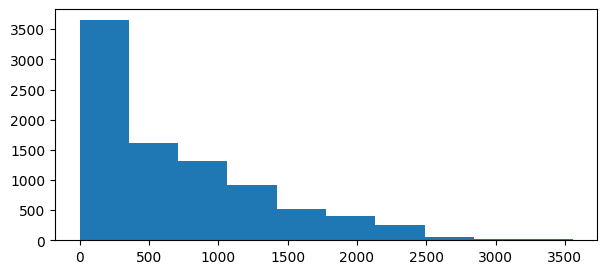

In [6]:
plt.figure(figsize=(7, 3))
plt.hist(df['Rented bike count']);

The distribution of the number of rented bikes is right-skewed. Let's see it as a boxplot as well:

<AxesSubplot: >

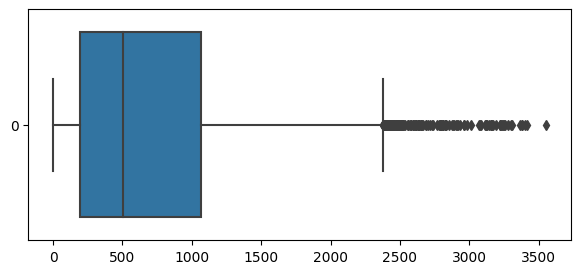

In [7]:
plt.figure(figsize=(7, 3))
sns.boxplot(df['Rented bike count'], orient='h')

### Summary statistics of the number of rented bikes

In [8]:
df['Rented bike count'].describe()

count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented bike count, dtype: float64

### Average count by month

<AxesSubplot: xlabel='Month'>

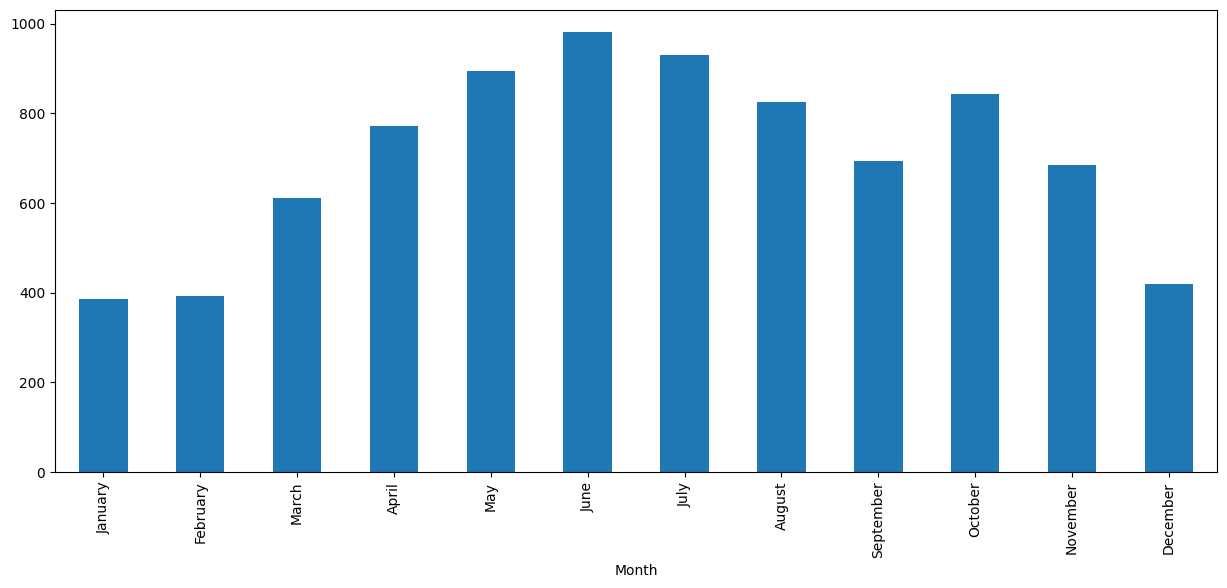

In [9]:
plt.figure(figsize=(15, 6))
df.groupby('Month')['Rented bike count'].mean().plot(kind='bar')

The figure shows that the average count of rented bike was highest during summer (May, June, July) and lowest at the end of winter (December) and beginning of spring (January, February). However, the number of rental bikes did increase considerably from September to October.

### Average count by hour of the day across season

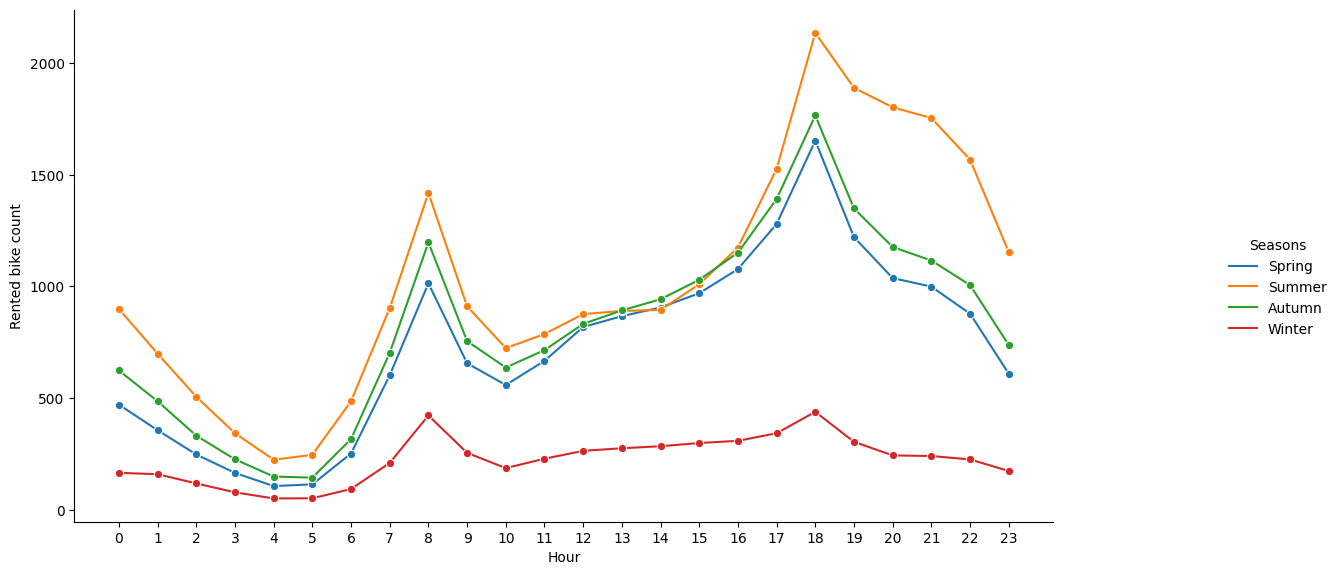

In [10]:
g = sns.relplot(x='Hour', y='Rented bike count', data=df, kind='line', marker='o', hue='Seasons', ci=None)
g.fig.set_size_inches(15, 6)
plt.xticks(np.arange(0, 24, 1));

All seasons witnessed the same trend in the average count of rented bike: 
- Peaked at 8AM and 6PM
- Lowest at 11PM

### Average count by hour of the day across month

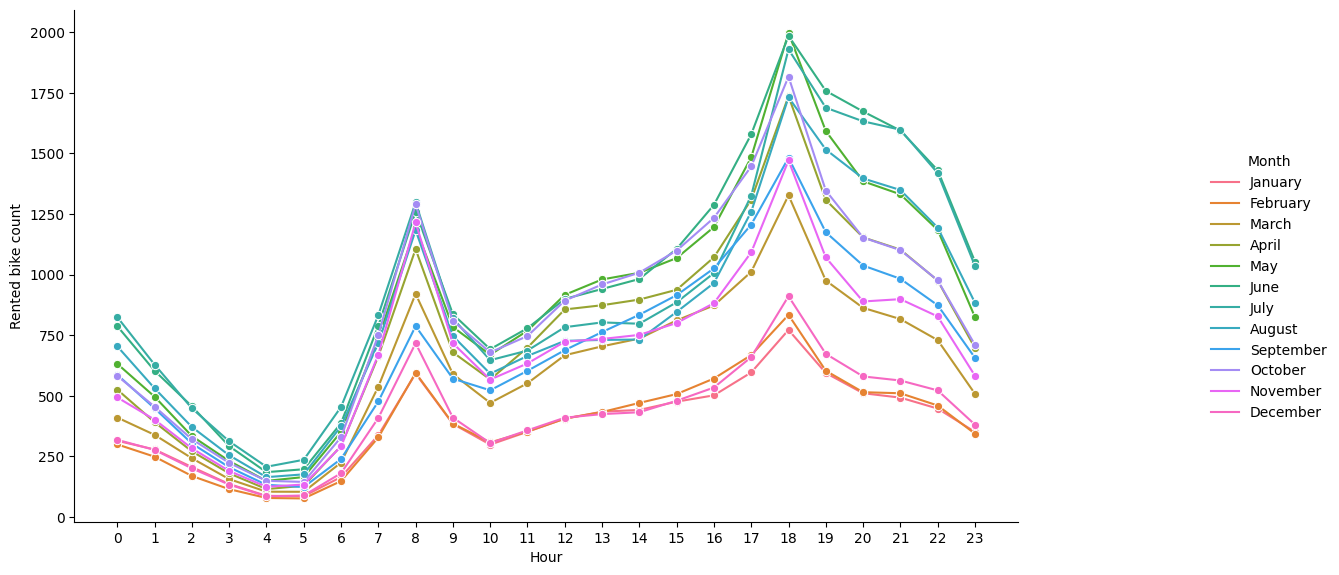

In [11]:
g = sns.relplot(x='Hour', y='Rented bike count', data=df, kind='line', marker='o', hue='Month', ci=None)
g.fig.set_size_inches(15, 6)
plt.xticks(np.arange(0, 24, 1));

The average count of rented bike in each month was consistent with the two above figures. 

### Average count by hour of the day across weekdays

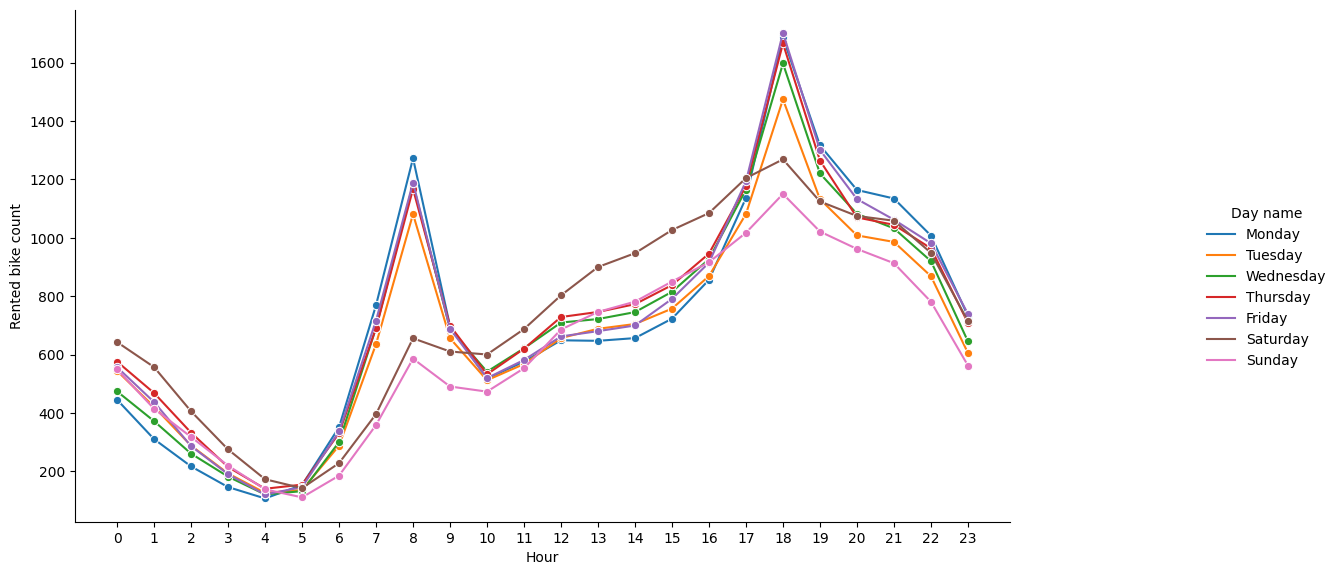

In [12]:
g = sns.relplot(x='Hour', y='Rented bike count', data=df, kind='line', marker='o', hue='Day name', ci=None)
g.fig.set_size_inches(15, 6)
plt.xticks(np.arange(0, 24, 1));

The same trend was recorded in the number of rented bikes during weekdays, i.e., it skyrocketed at 8AM and 6PM, except on weekends. Additionally, the average rented bike count during 10AM to 4PM was consistently higher than that of the other day.

### Relationship among variables

<AxesSubplot: >

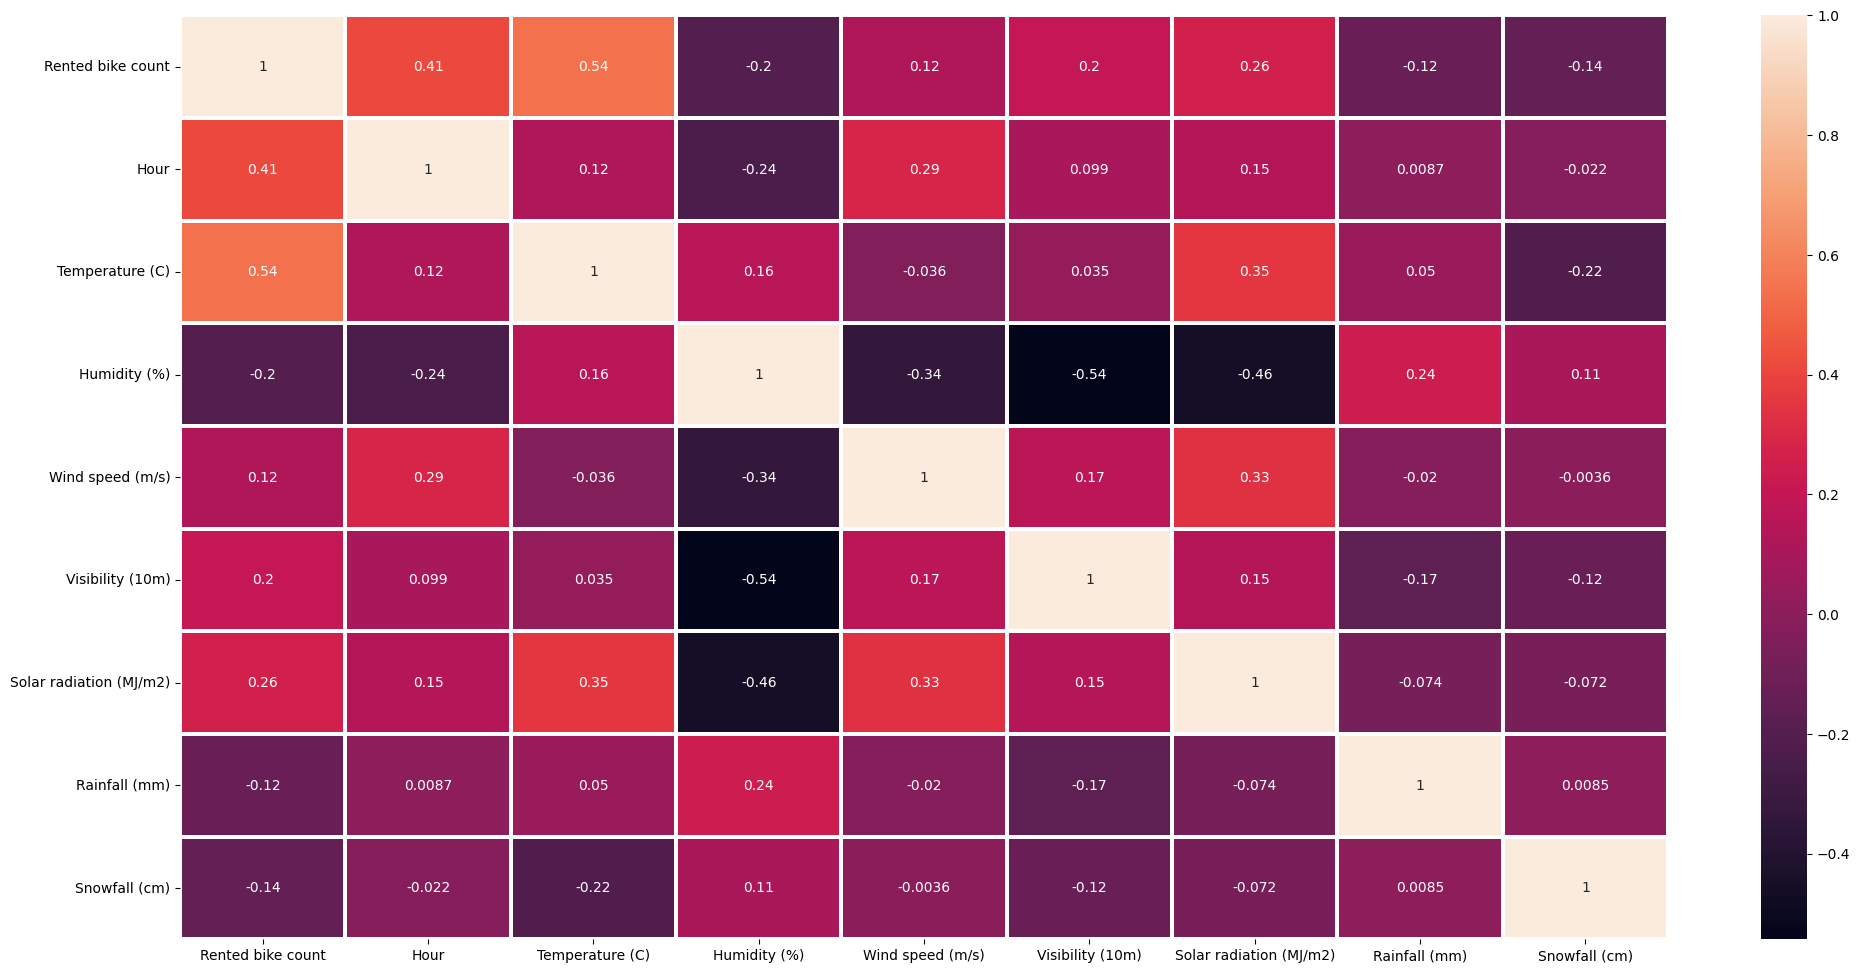

In [13]:
# Select columns
col = ['Rented bike count', 'Hour', 'Temperature (C)', 'Humidity (%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar radiation (MJ/m2)', 'Rainfall (mm)', 'Snowfall (cm)']

# Plot
plt.figure(figsize=(24, 12))
df_corr = df[col].corr()
sns.heatmap(df_corr, annot=True, linewidths=1.5)

From the correlation heatmap, we can see that there is positive correlation between the number of bikes rented and the temperature (0.54), which means the higher the temperature is, the more bikes are used. Another significant postitive correlation is between rental bike count with hour (0.41), indicating that the bike sharing scheme gets busier as the day goes (shown by the line plots above).

Additionally, there is negative correlation between the rental bike count and humidity (-0.2), rainfall (-0.12) as well as snowfall (-0.14). This indicates that when these factors are extreme, less rental bikes are used.

There is also notable postive correlation between count and wind speed (0.12), visibility (0.26), and solar radiation (0.26).

To visualize the strength of the relationship among variables better, scatter plots will be used in the following part.

### Relationship between temperature and the number of bikes rented differentiated between seasons

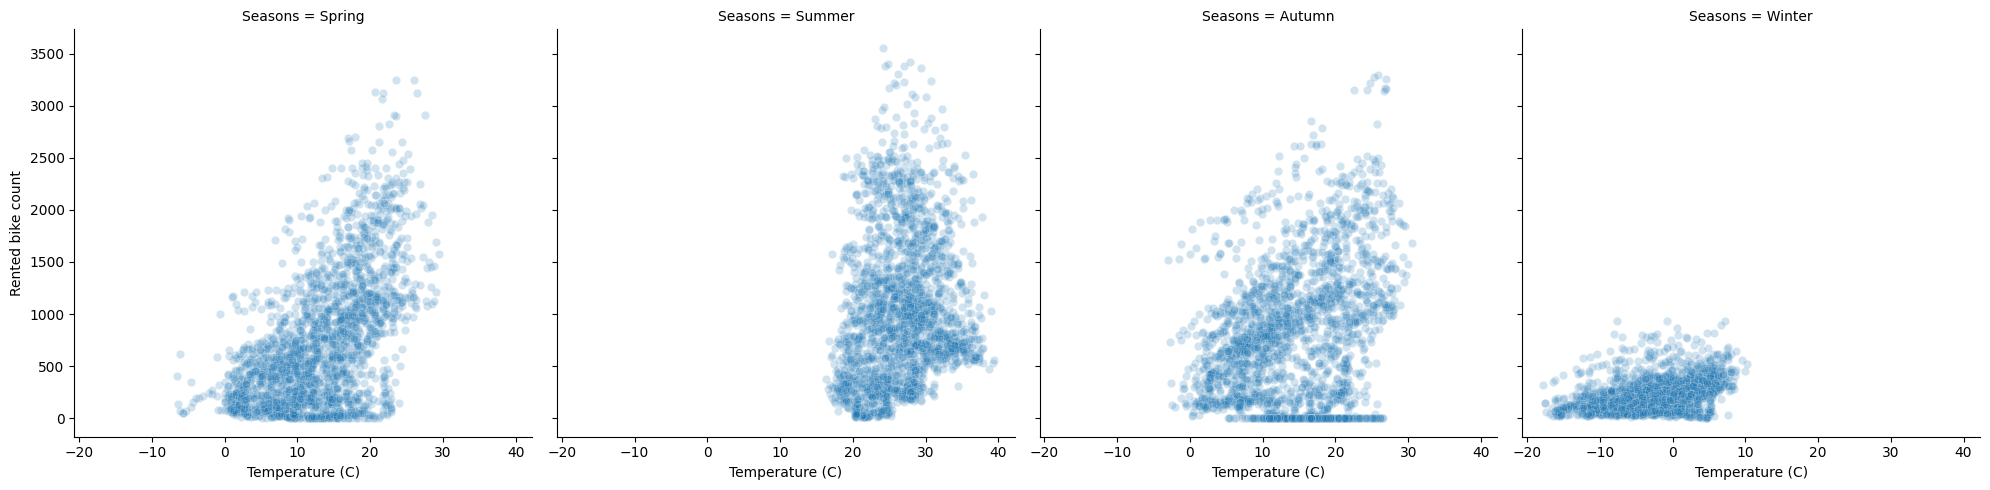

In [14]:
sns.relplot(x='Temperature (C)', y='Rented bike count', data=df, kind='scatter', alpha=0.2, col='Seasons')

Obviously temperature is associated with the demand significantly. 

Assuming that a count greater than 500 would be an acceptable demand, the most preferable temperature range for renting bike during spring and autumn seemed to be within around 5 to 20 degree Celcius, while in the summer, it was within about 25 to 35 degree Celcius. 

The number of rented bikes was considerably lower in winter due to the cold weather, but most seemed to rent the bikes when it was above 0 degree Celcius.

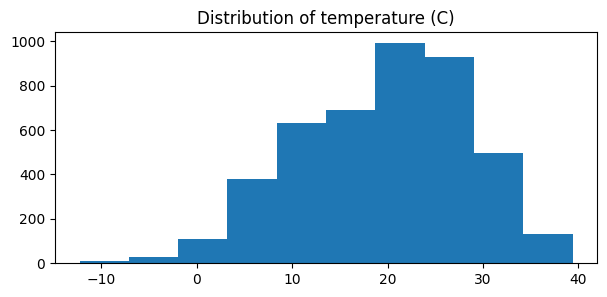

In [15]:
plt.figure(figsize=(7, 3))
df[df['Rented bike count'] > 500]['Temperature (C)'].hist()
plt.title('Distribution of temperature (C)')
plt.grid(None)

But overall, the most preferable range seems to be within 20 to 30 degrees. This piece of information could be useful for predicting demand.

### Relationship between rainfall and the number of bikes rented differentiated between seasons

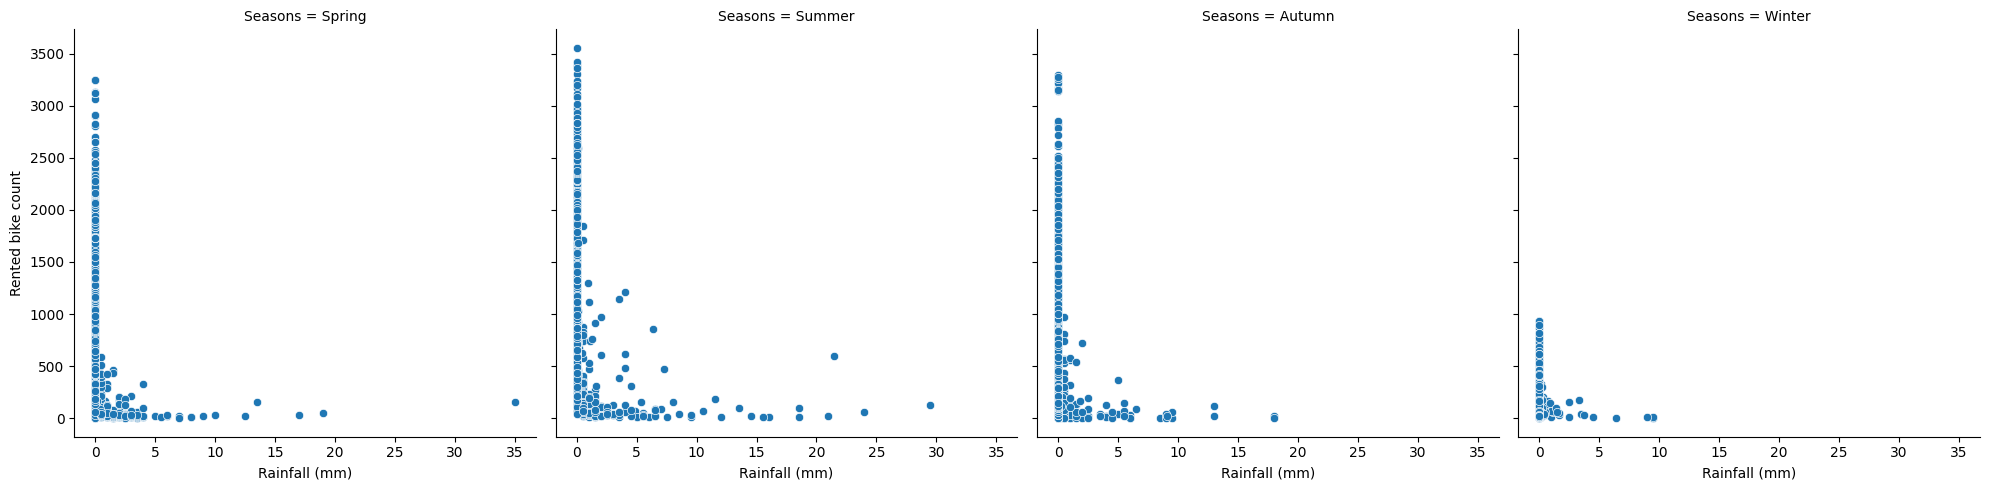

In [16]:
sns.relplot(x='Rainfall (mm)', y='Rented bike count', data=df, kind='scatter', col='Seasons')

### Others
After confirming the strong relationship between the number of rented bikes and temperature and rainfall across seasons, other variables will be illustrated altogether.

<AxesSubplot: xlabel='Snowfall (cm)', ylabel='Rented bike count'>

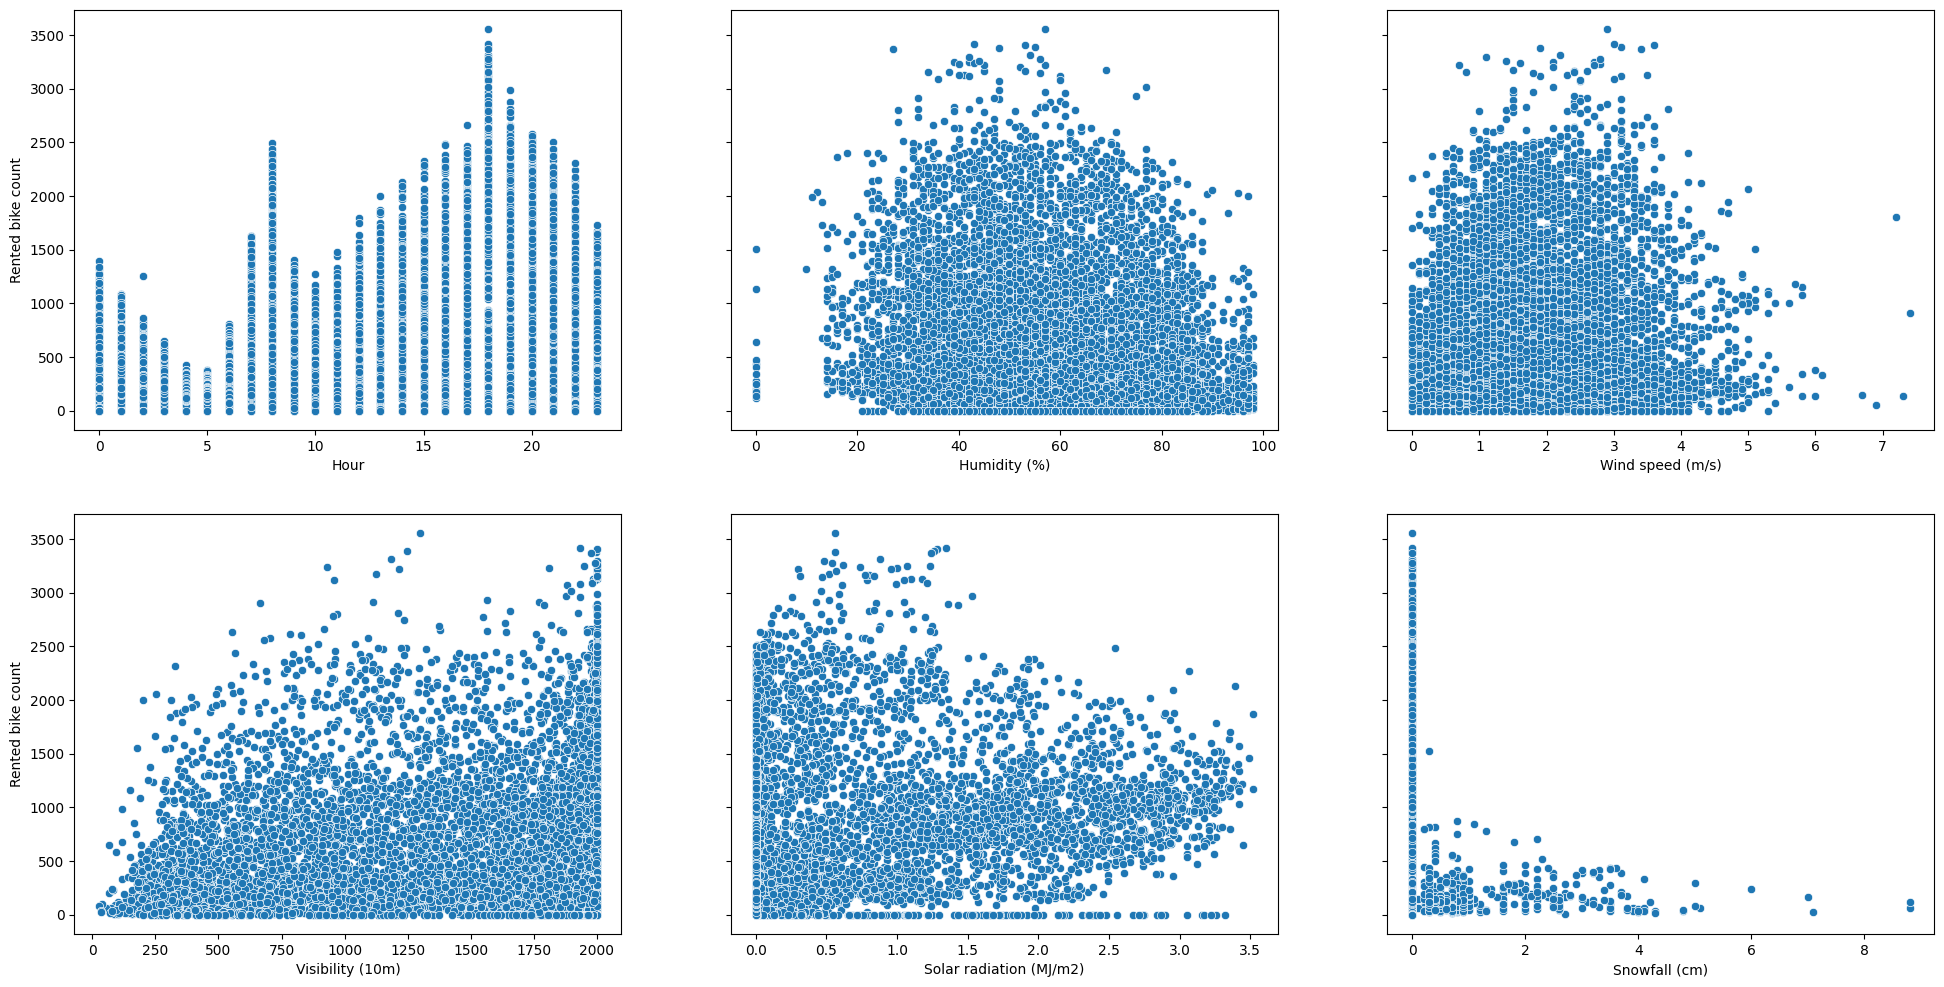

In [17]:
fig, ax = plt.subplots(2, 3, sharey=True, figsize=(24, 12))
sns.scatterplot(x='Hour', y='Rented bike count', data=df, ax=ax[0,0])
sns.scatterplot(x='Humidity (%)', y='Rented bike count', data=df, ax=ax[0,1])
sns.scatterplot(x='Wind speed (m/s)', y='Rented bike count', data=df, ax=ax[0,2])
sns.scatterplot(x='Visibility (10m)', y='Rented bike count', data=df, ax=ax[1,0])
sns.scatterplot(x='Solar radiation (MJ/m2)', y='Rented bike count', data=df, ax=ax[1,1])
sns.scatterplot(x='Snowfall (cm)', y='Rented bike count', data=df, ax=ax[1,2])

Overall, despite humidity and solar radiation being a bit too extreme, or visibility being too low, they would not significantly influence the number of rented bikes. Wind speed, however, if gets too strong might potentially decrease the demand. As for snowfall level, the less snow there is, the better.

### Comparisons of rented bike count among seasons differentiated between holiday

<AxesSubplot: xlabel='Seasons', ylabel='Rented bike count'>

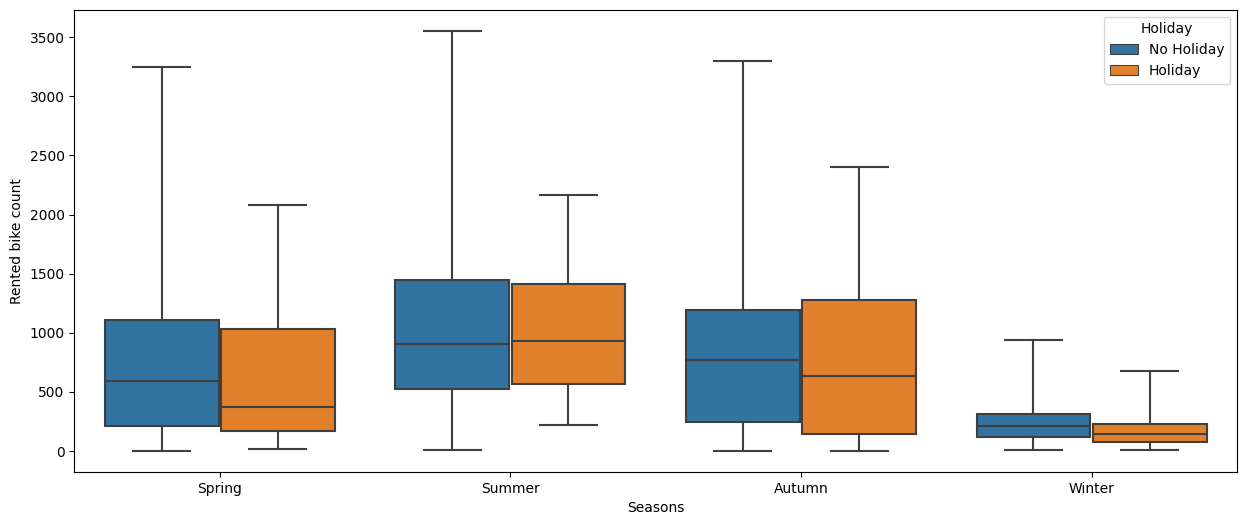

In [18]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='Seasons', y='Rented bike count', data=df, hue='Holiday', whis=10)

There doesn't seem to be much skewness among groups based on the median, except when holiday occured during spring, which had significantly affected the number of bikes rented.